<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 무작정 따라하기

In [1]:
# 해당 옵션을 사용하지 않으면 한글 깨짐..
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### Setting

In [3]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='Apple Gothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

### 유방암 데이터 집합

UCI 데이터 집합 배포 웹사이트: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#### 분석 데이터 이미지
<img src="https://www.researchgate.net/profile/Nick_Street/publication/2512520/figure/fig2/AS:279373199495169@1443619169198/Snakes-After-Convergence-to-Cell-Nucleus-Boundaries-These-contours-are-the-nal.png" alt="Drawing" width="40%" align="left">

<img src="https://paullabworkspace.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fed87aae9-69d5-4a2c-9dec-8bac624f431e%2FUntitled.png?id=9674917e-f8a9-4d54-8199-6697b5ca352f&table=block&spaceId=579fe283-28aa-489d-ae65-d683304becfc&width=950&userId=&cache=v2" alt="Drawing" width="40%" align="left">

유방암 검진에서 종양이 발견된 환자의 종양세포를 채취하고 이를 현미경으로 분석하여, 수치화한 정보를 모아둔 자료입니다.

모델의 목적은 정밀 검사 데이터를 입력해 진단결과를 예측하고자하며, 의사를 보조하는 역할로 쓰이고자 합니다.

모델의 예측결과는 악성과 양성으로 되어있고, 정답이 이미 있으므로 지도학습으로 봐도 됩니다.

### 1. 데이터 읽어 들이기

In [4]:
# 유방암 데이터 집합 읽어 들이기

# 라이브러리 임포트
from sklearn.datasets import load_breast_cancer

# 데이터 내려받기
cancer = load_breast_cancer()

# 데이터에 대한 설명 읽기
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# 데이터프레임으로 변환하기(한글명으로)

columns = [
    '반지름_평균', '텍스처_평균', '둘레길이_평균', '면적_평균',
    '평활도_평균', '콤팩트도_평균', '오목면_평균',
    '오목점_평균', '대칭성_평균', '프랙탈도_평균',
    '반지름_표준편차', '텍스처_표준편차', '둘레길이_표준편차',
    '면적_표준편차', '평활도_표준편차',
    '콤팩트도_표준편차', '오목면_표준편차', '오목점_표준편차',
    '대칭성_표준편차', '프랙탈도_표준편차',
    '반지름_최대', '텍스처_최대', '둘레길이_최대', '면적_최대',
    '평활도_최대', '콤팩트도_최대', '오목면_최대', '오목점_최대',
    '대칭성_최대', '프랙탈도_최대'
]

# 읽어 들인 데이터를 데이터프레임으로 변환
df = pd.DataFrame(cancer.data, columns=columns)

# 정답 데이터를 꺼냄
y = pd.Series(cancer.target)

In [6]:
df

,반지름_평균,텍스처_평균,둘레길이_평균,면적_평균,평활도_평균,콤팩트도_평균,오목면_평균,오목점_평균,대칭성_평균,프랙탈도_평균,반지름_표준편차,텍스처_표준편차,둘레길이_표준편차,면적_표준편차,평활도_표준편차,콤팩트도_표준편차,오목면_표준편차,오목점_표준편차,대칭성_표준편차,프랙탈도_표준편차,반지름_최대,텍스처_최대,둘레길이_최대,면적_최대,평활도_최대,콤팩트도_최대,오목면_최대,오목점_최대,대칭성_최대,프랙탈도_최대
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.5600,22.3900,142.0000,1479.0000,0.1110,0.1159,0.2439,0.1389,0.1726,0.0562,1.1760,1.2560,7.6730,158.7000,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042,25.4500,26.4000,166.1000,2027.0000,0.1410,0.2113,0.4107,0.2216,0.2060,0.0712
565,20.1300,28.2500,131.2000,1261.0000,0.0978,0.1034,0.1440,0.0979,0.1752,0.0553,0.7655,2.4630,5.2030,99.0400,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025,23.6900,38.2500,155.0000,1731.0000,0.1166,0.1922,0.3215,0.1628,0.2572,0.0664
566,16.6000,28.0800,108.3000,858.1000,0.0846,0.1023,0.0925,0.0530,0.1590,0.0565,0.4564,1.0750,3.4250,48.5500,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039,18.9800,34.1200,126.7000,1124.0000,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
567,20.6000,29.3300,140.1000,1265.0000,0.1178,0.2770,0.3514,0.1520,0.2397,0.0702,0.7260,1.5950,5.7720,86.2200,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062,25.7400,39.4200,184.6000,1821.0000,0.1650,0.8681,0.9387,0.2650,0.4087,0.1240


### 3.3.2 (2) 데이터 확인

In [7]:
# 입력 데이터를 화면에 출력하기

# 입력 데이터의 0번째 줄부터 8번째 줄까지 화면에 출력한다
display(df[0:9])

,반지름_평균,텍스처_평균,둘레길이_평균,면적_평균,평활도_평균,콤팩트도_평균,오목면_평균,오목점_평균,대칭성_평균,프랙탈도_평균,반지름_표준편차,텍스처_표준편차,둘레길이_표준편차,면적_표준편차,평활도_표준편차,콤팩트도_표준편차,오목면_표준편차,오목점_표준편차,대칭성_표준편차,프랙탈도_표준편차,반지름_최대,텍스처_최대,둘레길이_최대,면적_최대,평활도_최대,콤팩트도_최대,오목면_최대,오목점_최대,대칭성_최대,프랙탈도_최대
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768
5,12.4500,15.7000,82.5700,477.1000,0.1278,0.1700,0.1578,0.0809,0.2087,0.0761,0.3345,0.8902,2.2170,27.1900,0.0075,0.0335,0.0367,0.0114,0.0216,0.0051,15.4700,23.7500,103.4000,741.6000,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
6,18.2500,19.9800,119.6000,1040.0000,0.0946,0.1090,0.1127,0.0740,0.1794,0.0574,0.4467,0.7732,3.1800,53.9100,0.0043,0.0138,0.0225,0.0104,0.0137,0.0022,22.8800,27.6600,153.2000,1606.0000,0.1442,0.2576,0.3784,0.1932,0.3063,0.0837
7,13.7100,20.8300,90.2000,577.9000,0.1189,0.1645,0.0937,0.0599,0.2196,0.0745,0.5835,1.3770,3.8560,50.9600,0.0088,0.0303,0.0249,0.0145,0.0149,0.0054,17.0600,28.1400,110.6000,897.0000,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
8,13.0000,21.8200,87.5000,519.8000,0.1273,0.1932,0.1859,0.0935,0.2350,0.0739,0.3063,1.0020,2.4060,24.3200,0.0057,0.0350,0.0355,0.0123,0.0214,0.0037,15.4900,30.7300,106.2000,739.3000,0.1703,0.5401,0.5390,0.2060,0.4378,0.1072


In [8]:
# 정답 데이터를 화면에 출력하기

# 정답 데이터의 0번째 줄부터 8번째 줄까지 화면에 출력한다
print(y[0:9])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [9]:
# 데이터에 대한 통계 정보 확인하기

# 입력 데이터의 행과 열의 수를 확인
print(df.shape)
print()

# 정답 데이터의 1과 0의 건수 확인
print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [10]:
# 산포도를 그리기 위한 준비
# 입력 데이터를 대응하는 정답 데이터의 값에 따라 분할한다

# 정답 데이터 = 0(악성)인 데이터 골라내기
df0 = df[y==0]

# 정답 데이터 = 1(양성)인 데이터 골라내기
df1 = df[y==1]

display(df0.head())
display(df1.head())

,반지름_평균,텍스처_평균,둘레길이_평균,면적_평균,평활도_평균,콤팩트도_평균,오목면_평균,오목점_평균,대칭성_평균,프랙탈도_평균,반지름_표준편차,텍스처_표준편차,둘레길이_표준편차,면적_표준편차,평활도_표준편차,콤팩트도_표준편차,오목면_표준편차,오목점_표준편차,대칭성_표준편차,프랙탈도_표준편차,반지름_최대,텍스처_최대,둘레길이_최대,면적_최대,평활도_최대,콤팩트도_최대,오목면_최대,오목점_최대,대칭성_최대,프랙탈도_최대
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,반지름_평균,텍스처_평균,둘레길이_평균,면적_평균,평활도_평균,콤팩트도_평균,오목면_평균,오목점_평균,대칭성_평균,프랙탈도_평균,반지름_표준편차,텍스처_표준편차,둘레길이_표준편차,면적_표준편차,평활도_표준편차,콤팩트도_표준편차,오목면_표준편차,오목점_표준편차,대칭성_표준편차,프랙탈도_표준편차,반지름_최대,텍스처_최대,둘레길이_최대,면적_최대,평활도_최대,콤팩트도_최대,오목면_최대,오목점_최대,대칭성_최대,프랙탈도_최대
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


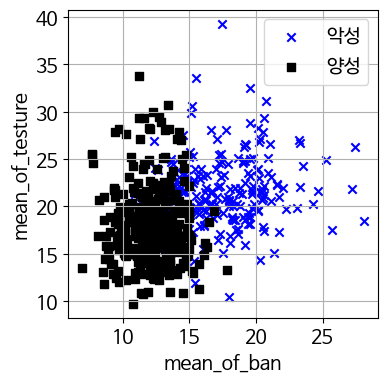

In [11]:
# 산포도 그리기

# 그래프의 크기를 설정
plt.figure(figsize=(4, 4))

# 목적변수 값이 0인 데이터의 산포도 그리기
plt.scatter(df0['반지름_평균'], df0['텍스처_평균'], marker='x',
    c='b', label='악성')

# 목적변수 값이 1인 데이터의 산포도 그리기
plt.scatter(df1['반지름_평균'], df1['텍스처_평균'], marker='s',
    c='k', label='양성')

# 그리드 표시
plt.grid()

# 레이블 표시
plt.xlabel('mean_of_ban')
plt.ylabel('mean_of_testure')

# 범례 그리기
plt.legend()

# 화면에 전체 그래프를 출력
plt.show()

### 3.3.3 (3) 데이터 전처리

In [12]:
# 입력 데이터를 두 개의 필드로 줄이기

input_columns = ['반지름_평균', '텍스처_평균']
x = df[input_columns]
display(x.head())

,반지름_평균,텍스처_평균
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


### 3.3.4 (4) 데이터 분할

우리가 사용하는 데이터는 대부분 데이터프레임형태의 테이블이 많습니다. 그 데이터 프레임에는 모델에서 예측하려고 하는 값(타겟)과 그를 설명하는 변수(입력변수)가 있습니다.

<img src="https://paullabworkspace.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F4eaf44bc-305e-4305-9eed-63ae7342f601%2FUntitled.png?id=90691507-7fa4-42c0-a562-f3eba1ef7401&table=block&spaceId=579fe283-28aa-489d-ae65-d683304becfc&width=1800&userId=&cache=v2" alt="Drawing" width="60%" align="left">

데이터를 이처럼 상하 좌우로 나누는 것을 데이터 분할이라고 표현합니다. 이를 나누어 정확도를 평가하거나 다양한 케이스로 비교해보는것이 목적입니다.

보통은 정확도를 기준으로 평가를 하지만 기준은 다양하며, 테스트 데이터에는 절대 train 데이터가 들어가있지 않게 주의해야합니다. 만약 100%가까운 정확도를 train data를 적합했을때 보이지만 test에서는 낮은 성능이 나온다면 과적합을 의심해야합니다.

이러한 이유로 데이터를 나누어서 비교하는 방법론을 적용해야하며, 데이터 분할이라고 합니다.

In [13]:
# 학습 데이터와 검증 데이터 분할하기

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [14]:
# 분할된 데이터를 확인하기(요소 수)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [15]:
# 분할된 데이터를 확인하기(요소 수)

display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,반지름_평균,텍스처_평균
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,반지름_평균,텍스처_평균
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int64

333    1
273    1
201    0
178    1
85     0
dtype: int64

### 3.3.5 (5) 알고리즘 선택하기
- LogisticRegression 로지스틱 회귀모델 - 분류

In [16]:
# 알고리즘 선택

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

### 3.3.6 (6) 학습

In [26]:
# 학습

algorithm.fit(x_train, y_train)
# print(algorithm)
# 첫번째는 입력 데이터, 두번째는 학습할 정답데이터입니다.
# 우리는 train데이터를 학습하고, test데이터를 테스트 하기로 했습니다.

algorithm.get_params()
# get_params는 내가 어떤 알고리즘을 썼는지, 어떤 파라미터를 썼는지를 파악할 수 있는 좋은 함수입니다.
# 이를 통해 우리는 추가적으로 변경할 수 있는 하이퍼 파라미터에 대해 알 수 있고,
# 실제 내가 입력한대로 실행되었는지를 파악할 수 있습니다.

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### 3.3.7 (7) 예측

In [18]:
# 예측

# predict 함수를 호출한다
y_pred = algorithm.predict(x_test)

# 예측 결과를 확인 -> 1차원 numpy 배열
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


### 3.3.8 (8) 평가

In [19]:
# 정답 데이터와 예측 결과 비교하기

# 정답 데이터를 앞에서부터 10건 추려냄
# y_test는 데이터프레임이므로 value 속성에 담긴 넘파이 배열로 변환한다
y_test10 = y_test[:10].values
print(y_test10)

# 예측 결과를 앞에서부터 10건 추려냄
y_pred10 = y_pred[:10]
print(y_pred10)

[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1]


In [20]:
# 정답을 맞힌 건수 세기

# 정답 데이터 == 예측 결과
w1 = (y_test10 == y_pred10)
print(w1)

# 정답을 맞힌 건수
w2 = w1.sum()
print(w2)

[ True  True  True  True  True  True  True False  True  True]
9


In [21]:
# 정확도 계산하기

# 정답을 맞힌 건수를 계산
w = (y_test.values == y_pred)
correct = w.sum()

# 검증 데이터 전체 건수
N = len(w)

# 정확도 = (정답 수) / (검증 데이터 전체 건수)
score = correct / N

# 결과를 출력
print(f'정확도: {score:.04f}')

정확도: 0.8772


In [22]:
# score 함수를 사용

# score 함수를 사용해도 정확도를 계산할 수 있다
score = algorithm.score(x_test, y_test)
print(f'score: {score:.04f}')

score: 0.8772


### 3.3.9 (9) 튜닝

In [23]:
# 모델의 정확도 개선하기

# 원래 있던 30개 필드를 모두 포함해 학습 데이터와 검증 데이터를 다시 만든다
x2_train, x2_test, y_train, y_test = train_test_split(df, y,
    train_size=0.7, test_size=0.3, random_state=random_seed)

# 로지스틱 회귀 모델도 다시 만든다
algorithm2 = LogisticRegression(random_state=random_seed)

# 새로 만든 학습 데이터로 학습을 진행한다
algorithm2.fit(x2_train, y_train)

# 검증 데이터로 정확도를 확인한다
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9649
